In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
cmap_name = 'my_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=6)

In [3]:
#df = pd.read_csv("CP800_initial_IMM_nano_2_ebsd_output.txt",sep='\t')
df = pd.read_csv("CP800_initial_3rd_RD_ND_EP_ebsd_output.txt",sep='\t')

In [4]:
print(df.shape)
print(df['X'].max() *10, df['Y'].max() *10)
df.head(30)

(274999, 10)
499.0 549.0


,X,Y,Phase,Euler_1,Euler_2,Euler_3,grainId_5deg,GrainAverIQ,GOS,KAM
0,0.0,0.0,2,35.4424,39.8160,84.1377,50,171.793,1.214010,0.211825
1,0.1,0.0,2,35.5728,39.9170,83.9942,50,171.793,1.214010,0.121266
2,0.2,0.0,2,35.5728,39.9170,83.9942,50,171.793,1.214010,0.173771
3,0.3,0.0,2,35.7172,40.0082,83.7871,50,171.793,1.214010,0.174090
4,0.4,0.0,2,35.9219,39.9634,83.5319,50,171.793,1.214010,0.156292
5,0.5,0.0,2,36.0948,39.9888,83.4317,50,171.793,1.214010,0.180774
6,0.6,0.0,2,36.0948,39.9888,83.4317,50,171.793,1.214010,0.258827
7,0.7,0.0,2,36.4162,40.0702,83.0903,50,171.793,1.214010,0.332431
8,0.8,0.0,2,36.5809,40.2690,82.8881,50,171.793,1.214010,0.357082
9,0.9,0.0,2,36.9288,40.4713,82.4151,50,171.793,1.214010,0.342560


In [5]:
data_to_show = df[['X', 'Y', 'Phase', 'grainId_5deg']]
print('Phases: ', np.sort(data_to_show['Phase'].unique()))
data_to_show.head(10)

Phases:  [1 2 3]


,X,Y,Phase,grainId_5deg
0,0.0,0.0,2,50
1,0.1,0.0,2,50
2,0.2,0.0,2,50
3,0.3,0.0,2,50
4,0.4,0.0,2,50
5,0.5,0.0,2,50
6,0.6,0.0,2,50
7,0.7,0.0,2,50
8,0.8,0.0,2,50
9,0.9,0.0,2,50


In [6]:
'''
def make_image(x_range, y_range, values):
    image_tab = np.zeros((x_range, y_range))
    
    print(x_range+1, y_range+1)
    
    for x in range(x_range):
        for y in range(y_range):
            image_tab[x_range-1-x][y] = values[x * (x_range-1) + y]
    
    return image_tab
'''
def make_image(row_range, col_range, values):
    image_tab = np.zeros((row_range+1, col_range+1))
    
    print(row_range+1, col_range+1)
    
    for i in range((row_range+1) * (col_range+1) - values.shape[0]):
        values = np.concatenate((values, [values[-1]]))
    
    
    for i in range(row_range+1):
        for j in range(col_range+1):
            image_tab[i][j] = values[i * (col_range+1) + j]
    
    return image_tab

In [7]:
## test ##
sq =[[0,0], [0,1], [0,2], [0,3],
     [1,0], [1,1], [1,2], [1,3],
     [2,0], [2,1], [2,2], [2,3],
     [3,0], [3,1], [3,2], [3,3]]
sq_df = pd.DataFrame(np.array(sq), columns=['Y', 'X'])
color = [1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 4, 4]
sq_df

,Y,X
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


In [8]:
## test ##
image_sq = make_image(sq_df['Y'].max(), sq_df['X'].max(), np.array(color))

4 4


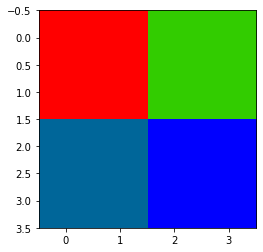

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [9]:
## test ##
plt.rcParams['figure.figsize'] = [4, 4]
plt.imshow(image_sq, cmap=cmap)
plt.show()
print(image_sq)

In [10]:
image_matrix = make_image(int(data_to_show['Y'].max() *10), int(data_to_show['X'].max() *10), data_to_show['Phase'].to_numpy())

550 500


In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

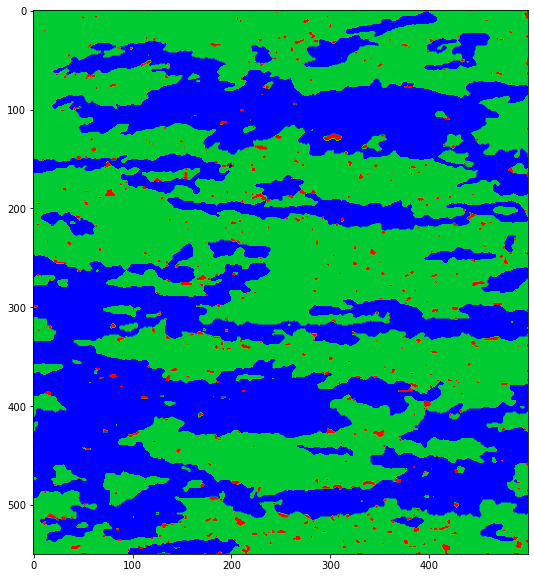

In [12]:
plt.imshow(image_matrix, cmap=cmap)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

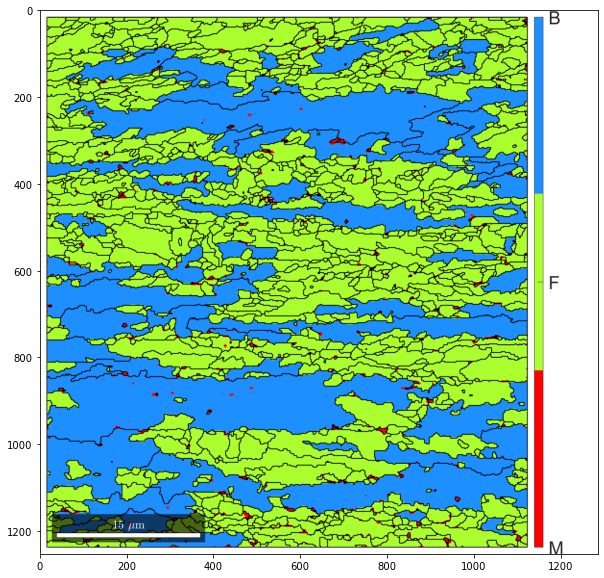

In [13]:
from PIL import Image

im = Image.open('Phase map.tif')
plt.imshow(im)
plt.show

In [14]:
'''
def display_grain_on_image(input_tab, grains, grain_number):
    output_tab = np.copy(input_tab)
    
    print(input_tab.shape[0]+1, input_tab.shape[1]+1)
    
    for x in range(input_tab.shape[0]):
        for y in range(input_tab.shape[1]):
            
            if(grains[x * (input_tab.shape[0]-1) + y] == grain_number):
                output_tab[x][y] = 0
    
    return output_tab
'''
def display_grain_on_image(input_tab, grains, grain_number):
    output_tab = np.copy(input_tab)
    
    print(input_tab.shape[0], input_tab.shape[1])
    
    for i in range((input_tab.shape[0]) * (input_tab.shape[1]) - grains.shape[0]):
        grains = np.concatenate((grains, [grains[-1]]))
    
    for i in range(input_tab.shape[0]):
        for j in range(input_tab.shape[1]):
            
            if(grains[i * input_tab.shape[1] + j] == grain_number):
                output_tab[i][j] = 0
    
    return output_tab

In [15]:
grain_image_matrix = display_grain_on_image(image_matrix, data_to_show['grainId_5deg'].to_numpy(), 50)

550 500


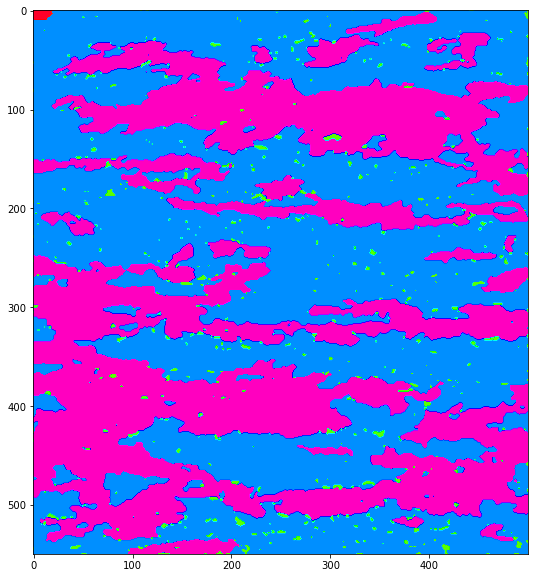

In [16]:
plt.imshow(grain_image_matrix, cmap=cm.get_cmap('gist_rainbow'))
plt.show()

In [17]:
'''
def image_binarization_by_grain(x_range, y_range, values, phase):
    image_tab = np.zeros((x_range, y_range))
    
    print(x_range+1, y_range+1)
    
    for x in range(x_range):
        for y in range(y_range):
            if(values[x * (x_range-1) + y] == phase):
                image_tab[x][y] = 1
            else:
                image_tab[x][y] = 0
    
    return image_tab
'''
def image_binarization_by_grain(row_range, col_range, values, phase):
    image_tab = np.zeros((row_range+1, col_range+1))
    
    print(row_range+1, col_range+1)
    
    for i in range((row_range+1) * (col_range+1) - values.shape[0]):
        values = np.concatenate((values, [values[-1]]))
    
    
    for i in range(row_range+1):
        for j in range(col_range+1):
            
            if(values[i * (col_range+1) + j] == phase):
                image_tab[i][j] = 1
            else:
                image_tab[i][j] = 0
    
    return image_tab

In [18]:
phase_image_matrix = image_binarization_by_grain(int(data_to_show['Y'].max() *10), int(data_to_show['X'].max() *10), data_to_show['Phase'].to_numpy(), 2)

550 500


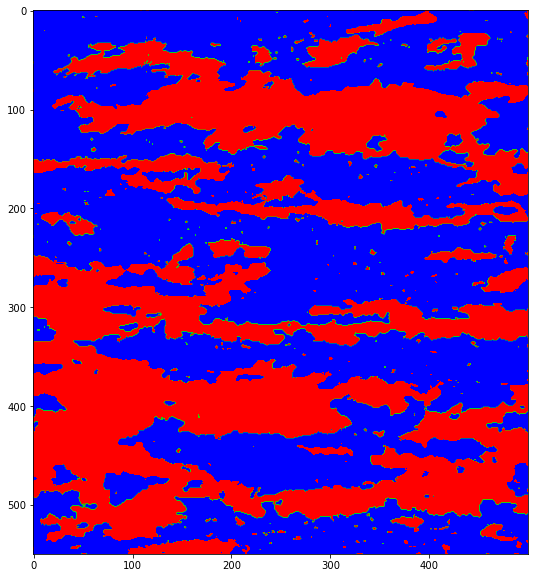

In [19]:
plt.imshow(phase_image_matrix, cmap=cmap)
plt.show()

In [20]:
def image_color_segmentation(input_tab, grains):
        output_tab = np.copy(input_tab)
        
        for i in range((input_tab.shape[0]+1) * (input_tab.shape[1]+1) - grains.shape[0]):
            grains = np.concatenate((grains, [grains[-1]]))
        
        
        for i in range(input_tab.shape[0]):
            for j in range(input_tab.shape[1]):
                output_tab[i][j] = np.remainder(grains[i * input_tab.shape[1] + j], 255)
        
        #grains = np.reshape(grains, (input_tab.shape[0]+1, input_tab.shape[1]+1))
        
        return output_tab / 255. #np.mod(grains, 255)/ 255.

In [21]:
image_matrix_segmentation = image_color_segmentation(image_matrix, data_to_show['grainId_5deg'].to_numpy())
image_matrix_segmentation = np.uint8(cm.gist_ncar(image_matrix_segmentation) *255)

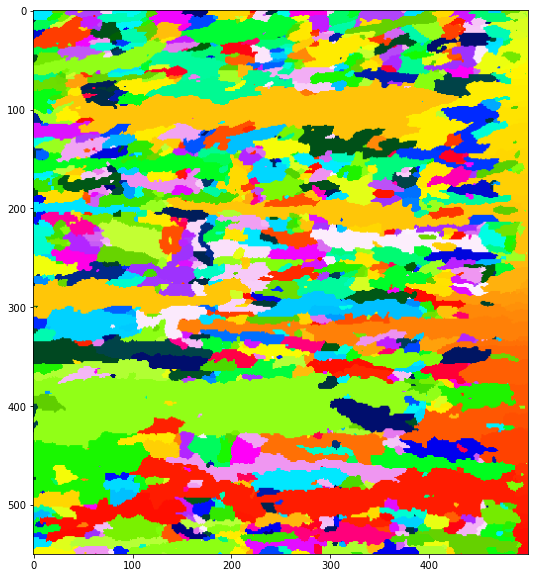

In [22]:
plt.imshow(image_matrix_segmentation)
plt.show()

In [23]:
def grain_sercher(row, grain_num):
    
    if row['grainId_5deg'] == grain_num:
        return row['X'], row['Y']

In [24]:
grain_201 = data_to_show.apply(lambda row: grain_sercher(row, 50), axis=1)

In [25]:
grain_201 = grain_201.dropna()
print(grain_201.shape)
grain_201 = grain_201.values.tolist()
grain_201

(174,)


[(0.0, 0.0),
 (0.1, 0.0),
 (0.2, 0.0),
 (0.3, 0.0),
 (0.4, 0.0),
 (0.5, 0.0),
 (0.6, 0.0),
 (0.7, 0.0),
 (0.8, 0.0),
 (0.9, 0.0),
 (1.0, 0.0),
 (1.1, 0.0),
 (1.2, 0.0),
 (1.3, 0.0),
 (1.4, 0.0),
 (1.5, 0.0),
 (1.6, 0.0),
 (1.7, 0.0),
 (1.8, 0.0),
 (1.9, 0.0),
 (0.0, 0.1),
 (0.1, 0.1),
 (0.2, 0.1),
 (0.3, 0.1),
 (0.4, 0.1),
 (0.5, 0.1),
 (0.6, 0.1),
 (0.7, 0.1),
 (0.8, 0.1),
 (0.9, 0.1),
 (1.0, 0.1),
 (1.1, 0.1),
 (1.2, 0.1),
 (1.3, 0.1),
 (1.4, 0.1),
 (1.5, 0.1),
 (1.6, 0.1),
 (1.7, 0.1),
 (1.8, 0.1),
 (0.0, 0.2),
 (0.1, 0.2),
 (0.2, 0.2),
 (0.3, 0.2),
 (0.4, 0.2),
 (0.5, 0.2),
 (0.6, 0.2),
 (0.7, 0.2),
 (0.8, 0.2),
 (0.9, 0.2),
 (1.0, 0.2),
 (1.1, 0.2),
 (1.2, 0.2),
 (1.3, 0.2),
 (1.4, 0.2),
 (1.5, 0.2),
 (1.6, 0.2),
 (1.7, 0.2),
 (1.8, 0.2),
 (0.0, 0.3),
 (0.1, 0.3),
 (0.2, 0.3),
 (0.3, 0.3),
 (0.4, 0.3),
 (0.5, 0.3),
 (0.6, 0.3),
 (0.7, 0.3),
 (0.8, 0.3),
 (0.9, 0.3),
 (1.0, 0.3),
 (1.1, 0.3),
 (1.2, 0.3),
 (1.3, 0.3),
 (1.4, 0.3),
 (1.5, 0.3),
 (1.6, 0.3),
 (1.7, 0.3),
 (1.8, 0.3),